In [1]:
"""Scatterplots"""

In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes

In [3]:
# Import postprocessed data after model prediction
dir_path = ''
#Recipients adaptation
df= pd.read_csv(dir_path+'/Data/Analysis/Recipients/recipients_adap_16_19.csv')
# Recipients Miti
df2=pd.read_csv(dir_path+'/Data/Analysis/Recipients/recipients_miti_16_19.csv')
print(df2.columns)

Index(['RecipientName', 'country_type', 'country_code', 'gdp',
       'Mitigation_funding', 'effective_funding', 'perc_Mitigation'],
      dtype='object')


In [4]:
# Rename columns and drop irrelevant
df = df.rename(columns={'Adaptation_funding':'adaptation_funding','perc_Adaptation':'percentage_adaptation'})
df2 = df2.rename(columns={'Mitigation_funding':'mitigation_funding','perc_Mitigation':'percentage_mitigation'})
df=df[['country_code','adaptation_funding','percentage_adaptation']]
# merge adaptation and mitigation
df2 = df2.merge(df,on='country_code', how='outer')

(141, 7)
                RecipientName                    country_type country_code  \
0                 Afghanistan                            LDCs          AFG   
1                     Albania                           UMICs          ALB   
2                     Algeria                           UMICs          DZA   
3                      Angola                            LDCs          AGO   
4         Antigua and Barbuda  Small Island Developing States          ATG   
..                        ...                             ...          ...   
136         Wallis and Futuna                           UMICs          WLF   
137  West Bank and Gaza Strip                           LMICs          PSE   
138                     Yemen                            LDCs          YEM   
139                    Zambia                            LDCs          ZMB   
140                  Zimbabwe                           LMICs          ZWE   

              gdp  mitigation_funding  effective_fundi

In [7]:
# ensure type is float
df2.gdp=df2.gdp.astype(float)
df2.percentage_adaptation=df2.percentage_adaptation.astype(float)
df2.percentage_mitigation=df2.percentage_mitigation.astype(float)

                RecipientName                    country_type country_code  \
0                 Afghanistan                            LDCs          AFG   
1                     Albania                           UMICs          ALB   
2                     Algeria                           UMICs          DZA   
3                      Angola                            LDCs          AGO   
4         Antigua and Barbuda  Small Island Developing States          ATG   
..                        ...                             ...          ...   
136         Wallis and Futuna                           UMICs          WLF   
137  West Bank and Gaza Strip                           LMICs          PSE   
138                     Yemen                            LDCs          YEM   
139                    Zambia                            LDCs          ZMB   
140                  Zimbabwe                           LMICs          ZWE   

              gdp  mitigation_funding  effective_funding  \
0  

In [8]:
#Drop Regions and missing recipients
df2=df2[(df2.country_type!='Region')&(df2.country_type!='missing')]

In [9]:
# calculations for line between and colors
df2.diff=(df2.percentage_mitigation)-(df2.percentage_adaptation)
df2.country_type='adap'
df2.country_type[(df2.diff)>0]='miti'
print(df2.country_type[df2.country_type=='miti'])

1      miti
4      miti
6      miti
9      miti
10     miti
14     miti
15     miti
16     miti
17     miti
19     miti
21     miti
22     miti
24     miti
27     miti
30     miti
31     miti
32     miti
34     miti
38     miti
39     miti
40     miti
45     miti
46     miti
52     miti
55     miti
56     miti
58     miti
59     miti
61     miti
64     miti
67     miti
69     miti
78     miti
79     miti
81     miti
82     miti
83     miti
84     miti
85     miti
88     miti
89     miti
91     miti
94     miti
96     miti
105    miti
106    miti
108    miti
109    miti
110    miti
111    miti
112    miti
114    miti
116    miti
123    miti
125    miti
129    miti
131    miti
137    miti
138    miti
Name: country_type, dtype: object


C:\Users\malte\Documents\GitHub\Climate_Finance_Bert\virtualenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

#Create figure
plt.rcParams['font.family'] = "Arial"
plt.rcParams['figure.figsize'] = (7, 7)
def line_between(df, line):
        x_values=[df.gdp[line], df.gdp[line]]
        y_values= [df.percentage_mitigation[line], df.percentage_adaptation[line]]
        plt.plot(x_values,y_values,linestyle='dashed',alpha=0.1,color='black',linewidth=1)


def scatter_pop(df,output_folder):
    df=df[df.country_code!='missing'].reset_index(drop=True)
    colorpalette=['#d95f0e','#31a354']#['#d7191c','#d95f02','#e78ac3','#abd9e9','#2c7bb6'] #,'#2c7bb6'



    for line in range(0,df.shape[0]):
        """LINES BETWEEN POINTS"""
        if df.RecipientName[line]=='Brazil':
            line_between(df, line)

        elif df.RecipientName[line]=='Kenya':
            line_between(df, line)

        elif df.country_code[line]=='CHN':
            line_between(df, line)

        elif df.RecipientName[line]=='India':
            line_between(df, line)

        elif df.RecipientName[line]=='Morocco':
            line_between(df, line)

        elif df.RecipientName[line]=='Turkey':
            line_between(df, line)

        elif df.RecipientName[line]=='Egypt':
            line_between(df, line)

        elif df.RecipientName[line]=='Mexico':
            line_between(df, line)

        elif df.RecipientName[line]=='Indonesia':
            line_between(df, line)

        elif df.RecipientName[line]=='Afghanistan':
            line_between(df, line)
        elif df.RecipientName[line]=='Bangladesh':
            line_between(df, line)
        elif df.RecipientName[line]=='Viet Nam':
            line_between(df, line)
        elif df.country_code[line]=='PHL':
            line_between(df, line)
        elif df.country_code[line]=='ETH':
            line_between(df, line)
        elif df.RecipientName[line]=='Malawi':
           line_between(df, line)




   # plt.xscale('log')
    # Create scatterplot. alpha controls the opacity and s controls the size.
    ax = sns.scatterplot(data=df, x='gdp', y='percentage_mitigation', alpha = 0.6, palette=colorpalette,
                          hue='country_type',# s=100,
                         s=70,
                        # style='regional',
                         markers=['.'],
                     #   hue_order=["Small Island Developing States","LDCs","LMICs",
                      #             "UMICs","MADCTs"] #,"Region"
     )

    ax = sns.scatterplot(data=df, x='gdp', y='percentage_adaptation', alpha = 0.6, palette=colorpalette,
                          hue='country_type',# s=100,
                         s=70,
                         style='regional',
                         markers=['s'],
                     #    hue_order=["Small Island Developing States","LDCs","LMICs",
                       #             "UMICs","MADCTs"] #,"Region"
    )

    ax.set_xscale('log')
    ax.set_ylabel('Share of Global Adaptation/Mitigation Finance \n by Recipient', labelpad=15, color='#333333',fontsize=12)
    ax.set_xlabel('Total GDP in billion USD, Log Scale', labelpad=15, color='#333333',fontsize=12)
    #For each point, we add a text inside the bubble
    print('Beschriftungen')


    #Create custom legend
    legend_list = []
   # numbers=[0,1,2,3,4]
   # labels=["Small Island Developing States","LDCs","LMICs","UMICs","MADCTs"] #,"Region"

  #  for i in numbers:

     #   legend_list.append(Line2D([0], [0], marker='o',markerfacecolor=colorpalette[i], label=labels[i], color='w',markersize=12))

   # legend_list.append(Line2D([0], [0], marker='o',markerfacecolor='white', label='', color='w',markersize=12))
    legend_list.append(Line2D([0], [0], marker='s',markerfacecolor='black', label='Adaptation', color='w',markersize=12))
    legend_list.append(Line2D([0], [0], marker='o',markerfacecolor='black', label='Mitigation', color='w',markersize=12))


    plt.xlim(1000000,100000000000000)
    #plt.ylim(0,18)

    for line in range(0,df.shape[0]):

        """NAMES FOR SPECIAL COUNTRIES"""
        """
        if df.RecipientName[line]=='Brazil':
             ax.text(df.gdp[line], df.perc_climate_funding[line]+0.1, df[dim][line], horizontalalignment='center',
                    size='medium', color='black', weight='semibold')


        elif df.RecipientName[line]=='Afghanistan':
             ax.text(df.gdp[line], df.perc_funding_total[line]+0.1, df[dim][line], horizontalalignment='center',
                    size='medium', color='black', weight='semibold')

        elif df.RecipientName[line]=='India':
            ax.text(df.gdp[line], df.perc_climate_funding[line]+0.1, df[dim][line], horizontalalignment='center',
                    size='medium', color='black', weight='semibold')
            ax.text(df.gdp[line], df.perc_funding_total[line]+0.1, df[dim][line], horizontalalignment='center',
                    size='medium', color='black', weight='semibold')
        """
        if df.country_code[line]=='CHN':
             ax.text(df.gdp[line], df.percentage_adaptation[line]+0.2, 'China', horizontalalignment='center',
                    size='medium', color='black', weight='normal')#

        elif df.RecipientName[line]=='Indonesia':
             ax.text(df.gdp[line], df.percentage_mitigation[line]+0.1, df['RecipientName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
        elif df.RecipientName[line]=='Bangladesh':
             print('Bangladesh out')
        elif df.RecipientName[line]=='South Africa':
             print('SA out')
        elif df.RecipientName[line]=='Iraq':
             print('Iraq')
        elif df.country_code[line]=='PHL':
             ax.text(df.gdp[line], df.percentage_adaptation[line]+0.1, df['RecipientName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
        elif df.country_code[line]=='ETH':
             ax.text(df.gdp[line], df.percentage_adaptation[line]+0.1, df['RecipientName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')

        elif df.RecipientName[line]=='Colombia':
            print('Colombia')
        elif df.RecipientName[line]=='Viet Nam':
             ax.text(df.gdp[line], df.percentage_adaptation[line]+0.1, df['RecipientName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
        elif df.RecipientName[line]=='Malawi':
            ax.text(df.gdp[line], df.percentage_adaptation[line]-0.4, df['RecipientName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
        elif df.RecipientName[line]=='Kenya':
            ax.text(df.gdp[line], df.percentage_adaptation[line]+0.1, df['RecipientName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')

        elif (df.percentage_mitigation[line]>3):
            ax.text(df.gdp[line], df.percentage_mitigation[line]+0.1, df['RecipientName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')





    """LUPE: """
    #3,3.9
    axins = inset_axes(ax, 2.2,2.6 , loc=6,bbox_to_anchor=(0.175, 0.52),bbox_transform=ax.figure.transFigure) # no zoom
    #axins = zoomed_inset_axes(ax, 2,loc=6)#,bbox_to_anchor=(0.8,0.8,0.5,0.5)) #loc=6) #loc gibt an wo das zoom bild ist
    axins = sns.scatterplot(data=df, x='gdp', y='percentage_adaptation', alpha = 0.6, palette=colorpalette,
                          hue='country_type',# s=100,
                         s=70,
                         style='regional',
                         markers=['s'],
                        ax=axins,
                       #  hue_order=["Small Island Developing States","LDCs","LMICs",
                           #         "UMICs","MADCTs"], #,"Region"
                    legend=False
                    )

    axins = sns.scatterplot(data=df, x='gdp', y='percentage_mitigation', alpha = 0.6, palette=colorpalette,
                      hue='country_type',# s=100,
                     s=300,
                            ax=axins,
                     style='regional',
                       markers=['.'],
                            legend=False,
                   #  hue_order=["Small Island Developing States","LDCs","LMICs",
                       #         "UMICs","MADCTs"]) #,"Region"

        )

    x1, x2, y1, y2 = 90000000, 8900000000, -0.05,1.1        #-8212802.138816187, -6812802.138816187,457980.2547751378,1527980.2547751378  #df.query('Country_Code == "PAN"').total_bounds#-750, -500, 200, 250 # specify the limits
    print(x1,x2,y1,y2)
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2) # apply the y-limits

    mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.5", zorder=4)
    axins.set_xscale('log')
    axins.plot()

    for line in range(0,df.shape[0]):

        if df.RecipientName[line]=='Samoa':
            axins.text(df.gdp[line], df.percentage_adaptation[line]+0.015, df['RecipientName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
            line_between(df, line)
        elif df.RecipientName[line]=='Fiji':
            axins.text(df.gdp[line], df.percentage_adaptation[line]+0.015, df['RecipientName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
            line_between(df, line)
        elif df.RecipientName[line]=='Timor-Leste':
            axins.text(df.gdp[line], df.percentage_adaptation[line]+0.015, df['RecipientName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
            line_between(df, line)

        elif df.RecipientName[line]=='Liberia':
            axins.text(df.gdp[line], df.percentage_adaptation[line]+0.035, df['RecipientName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
            line_between(df, line)

        elif df.RecipientName[line]=='Mauritania':
            axins.text(df.gdp[line], df.percentage_adaptation[line]+0.035, df['RecipientName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
            line_between(df, line)






    axins.set_ylabel('')
    axins.set_xlabel('')

    axins.axes.xaxis.set_visible(False)
    #axins.axes.yaxis.set_visible(False)



    ax.legend(handles=legend_list, loc='upper left')
    plt.savefig(output_folder, bbox_inches = "tight", dpi=1200)

Beschriftungen
Bangladesh out
Colombia
Iraq
SA out
90000000 8900000000 -0.05 1.1


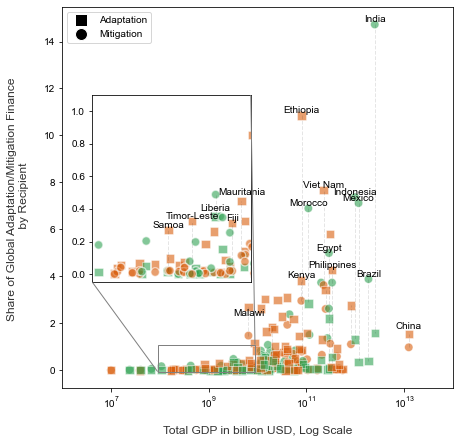

In [12]:
### Plot the figure
output_folder_miti_rec=dir_path+'Figures/Fig2/recipients_scatter.pdf'
scatter_pop(df=df2,output_folder=output_folder_miti_rec)



In [1]:
"""Same Plot for Contributors"""
import pandas as pd
##############
dir_path = ''
##############
#Donors adaptation
df=pd.read_csv(dir_path+'/Data/Analysis/Donors/donors_adap_16_19.csv')
# Recipients Miti
df2=pd.read_csv(dir_path+'/Data/Analysis/Donors/donors_miti_16_19.csv')

In [2]:
# rename columns and drop irrelevant
df = df.rename(columns={'Adaptation_funding':'adaptation_funding','perc_Adaptation':'percentage_adaptation'})
df2 = df2.rename(columns={'Mitigation_funding':'mitigation_funding','perc_Mitigation':'percentage_mitigation'})
df=df[['country_code','adaptation_funding','percentage_adaptation']]
# merge dfs
df2 = df2.merge(df,on='country_code', how='outer')


(40, 7)
               DonorName        DonorType country_code           gdp  \
0              Australia  bilateral donor          AUS  1.343450e+12   
1                Austria  bilateral donor          AUT  4.194370e+11   
2             Azerbaijan  bilateral donor          AZE  4.539361e+10   
3                Belgium  bilateral donor          BEL  5.028270e+11   
4                 Canada  bilateral donor          CAN  1.637390e+12   
5                Croatia  bilateral donor          HRV  5.557083e+10   
6         Czech Republic  bilateral donor          CZE  2.178620e+11   
7                Denmark  bilateral donor          DNK  3.297920e+11   
8                Estonia  bilateral donor          EST  2.720771e+10   
9                Finland  bilateral donor          FIN  2.549650e+11   
10                France  bilateral donor          FRA  2.601610e+12   
11               Germany  bilateral donor          DEU  3.657660e+12   
12                Greece  bilateral donor          GRC  

In [4]:
#ensure dtype is float
print(df2)
df2.gdp=df2.gdp.astype(float)
df2.percentage_adaptation=df2.percentage_adaptation.astype(float)
df2.percentage_mitigation=df2.percentage_mitigation.astype(float)


               DonorName        DonorType country_code           gdp  \
0              Australia  bilateral donor          AUS  1.343450e+12   
1                Austria  bilateral donor          AUT  4.194370e+11   
2             Azerbaijan  bilateral donor          AZE  4.539361e+10   
3                Belgium  bilateral donor          BEL  5.028270e+11   
4                 Canada  bilateral donor          CAN  1.637390e+12   
5                Croatia  bilateral donor          HRV  5.557083e+10   
6         Czech Republic  bilateral donor          CZE  2.178620e+11   
7                Denmark  bilateral donor          DNK  3.297920e+11   
8                Estonia  bilateral donor          EST  2.720771e+10   
9                Finland  bilateral donor          FIN  2.549650e+11   
10                France  bilateral donor          FRA  2.601610e+12   
11               Germany  bilateral donor          DEU  3.657660e+12   
12                Greece  bilateral donor          GRC  2.046780

In [6]:
#calculate line and color of contributors
df2.diff=df2.percentage_mitigation-df2.percentage_adaptation
#print(df2.diff)
df2['country_type']='adap'
df2['country_type'][df2.diff>0]='miti'
print(df2.country_type[df2.country_type=='miti'])

1     miti
8     miti
9     miti
10    miti
11    miti
13    miti
14    miti
17    miti
19    miti
20    miti
21    miti
22    miti
26    miti
29    miti
30    miti
31    miti
36    miti
37    miti
Name: country_type, dtype: object


C:\Users\malte\Documents\GitHub\Climate_Finance_Bert\virtualenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

#Create figure
plt.rcParams['font.family'] = "Arial"
plt.rcParams['figure.figsize'] = (7, 7)
def line_between(df, line):
        x_values=[df.gdp[line], df.gdp[line]]
        y_values= [df.percentage_mitigation[line], df.percentage_adaptation[line]]
        plt.plot(x_values,y_values,linestyle='dashed',alpha=0.1,color='black',linewidth=1)


def scatter_donors(df,output_folder):
    df=df[df.country_code!='missing'].reset_index(drop=True)
    colorpalette=['#d95f0e','#31a354']#colorpalette=['#d7191c','#d95f02','#e78ac3','#abd9e9','#2c7bb6'] #,'#2c7bb6'



    for line in range(0,df.shape[0]):
        """LINES BETWEEN POINTS"""
        if df.country_code[line]=='USA':
            line_between(df, line)
        elif df.DonorName[line]=='Germany':
            line_between(df, line)
        elif df.DonorName[line]=='Norway':
            line_between(df, line)
        elif df.DonorName[line]=='France':
            line_between(df, line)
        elif df.DonorName[line]=='United Kingdom':
            line_between(df, line)
        elif df.DonorName[line]=='Japan':
            line_between(df, line)
        elif df.percentage_adaptation[line]>3:
            line_between(df, line)

   # plt.xscale('log')
    # Create scatterplot. alpha controls the opacity and s controls the size.
    ax = sns.scatterplot(data=df, x='gdp', y='percentage_mitigation', alpha = 0.6, palette=colorpalette,
                          hue='country_type',# s=100,
                         color = 'black',
                         s=70,
                        # style='regional',
                         markers=['.'],
                      #  hue_order=["Small Island Developing States","LDCs","LMICs",
                       #            "UMICs","MADCTs"] #,"Region"
     )

    ax = sns.scatterplot(data=df, x='gdp', y='percentage_adaptation', alpha = 0.6, palette=colorpalette,
                          hue='country_type',# s=100,
                         color = 'black',
                         s=70,
                         style='regional',
                         markers=['s'],
                        # hue_order=["Small Island Developing States","LDCs","LMICs",
                          #          "UMICs","MADCTs"] #,"Region"
    )

    plt.xlim(10000000000,100000000000000)
    #plt.ylim(0,20)

    for line in range(0,df.shape[0]):

        """NAMES FOR SPECIAL COUNTRIES"""

        if df.DonorName[line]=='Norway':
             ax.text(df.gdp[line]+0.6, df.percentage_mitigation[line]+0.7, df['DonorName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')

        elif df.DonorName[line]=='United Kingdom':
             ax.text(df.gdp[line]-100000000000, df.percentage_adaptation[line]+0.15, df['DonorName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')

        elif df.country_code[line]=='USA':
             ax.text(df.gdp[line]-2.5, df.percentage_adaptation[line]+0.1, df['DonorName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
        elif df.DonorName[line]=='Japan':
             ax.text(df.gdp[line], df.percentage_mitigation[line]+0.25, df['DonorName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
        elif df.DonorName[line]=='France':
             ax.text(df.gdp[line], df.percentage_mitigation[line]+0.25, df['DonorName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
        elif df.DonorName[line]=='Sweden':
             ax.text(df.gdp[line], df.percentage_adaptation[line]+0.25, df['DonorName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
        elif df.DonorName[line]=='Canada':
             ax.text(df.gdp[line], df.percentage_adaptation[line]+0.25, df['DonorName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
        elif df.DonorName[line]=='Switzerland':
             ax.text(df.gdp[line]+100000000000, df.percentage_adaptation[line], df['DonorName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')

        elif (df.percentage_mitigation[line]>5):
            ax.text(df.gdp[line], df.percentage_mitigation[line]+0.1, df['DonorName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')


    ax.set_xscale('log')
    ax.set_ylabel('Share of Global Adaptation/Mitigation Finance \n by Contributor', labelpad=15, color='#333333',fontsize=12)
    ax.set_xlabel('Total GDP in billion USD, Log Scale', labelpad=15, color='#333333',fontsize=12)
    #For each point, we add a text inside the bubble
    print('Beschriftungen')


    #Create custom legend
    legend_list = []
    numbers=[0,1,2,3,4]
    labels=["Small Island Developing States","LDCs","LMICs","UMICs","MADCTs"] #,"Region"

   # for i in numbers:

    #    legend_list.append(Line2D([0], [0], marker='o',markerfacecolor=colorpalette[i], label=labels[i], color='w',markersize=12))

   # legend_list.append(Line2D([0], [0], marker='o',markerfacecolor='white', label='', color='w',markersize=12))
    legend_list.append(Line2D([0], [0], marker='s',markerfacecolor='black', label='Adaptation', color='w',markersize=12))
    legend_list.append(Line2D([0], [0], marker='o',markerfacecolor='black', label='Mitigation', color='w',markersize=12))



    #plt.ylim(0,18)





    """LUPE: """

    axins = inset_axes(ax, 2,2.5 , loc=1,bbox_to_anchor=(0.5, 0.7),bbox_transform=ax.figure.transFigure) # no zoom
    #axins = zoomed_inset_axes(ax, 2,loc=6)#,bbox_to_anchor=(0.8,0.8,0.5,0.5)) #loc=6) #loc gibt an wo das zoom bild ist
    axins = sns.scatterplot(data=df, x='gdp', y='percentage_adaptation', alpha = 0.6,
                         s=70,
                         markers=['s'],
                        ax=axins,
                         legend=False,
                            color = 'black',
                         style='organization',
                        # hue_order=response_order,
                         hue='country_type', palette=colorpalette
                    )

    axins = sns.scatterplot(data=df, x='gdp', y='percentage_mitigation', alpha = 0.6,
                            s=70,
                            ax=axins,
                            markers=['.'],
                            legend=False,
                            color = 'black',
                        # hue_order=response_order,
                         hue='country_type',
                          palette=colorpalette
                            )


    x1, x2, y1, y2 = 85000000000,2500000000000,-0.08,2.5
    print(x1,x2,y1,y2)
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2) # apply the y-limits
    #Log the Scale:
    ax.set_xscale('log')
    # define the inset (Ramen, linien)
    mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5", zorder=4)
    axins.plot()

    for line in range(0,df.shape[0]):

        if df.DonorName[line]=='Norway':
            pass

        elif df.DonorName[line]=='Netherlands':
            axins.text(df.gdp[line], df.percentage_adaptation[line]+0.05, df['DonorName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
            line_between(df, line)

        elif df.DonorName[line]=='Korea':
            axins.text(df.gdp[line], df.percentage_adaptation[line]+0.05, df['DonorName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
            line_between(df, line)

        elif df.DonorName[line]=='Australia':
            axins.text(df.gdp[line], df.percentage_adaptation[line]+0.05, df['DonorName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
            line_between(df, line)

       # elif df.DonorName[line]=='Spain':
          #  axins.text(df.gdp[line], df.percentage_adaptation[line]+0.05, df['DonorName'][line], horizontalalignment='center',
           #         size='medium', color='black', weight='normal')
           # line_between(df, line)
        elif df.DonorName[line]=='Italy':
            axins.text(df.gdp[line]+50000000000, df.percentage_adaptation[line]+0.05, df['DonorName'][line], horizontalalignment='center',
                    size='medium', color='black', weight='normal')
            line_between(df, line)

        elif df.DonorName[line]=='Switzerland':
              line_between(df, line)
        elif df.DonorName[line]=='Sweden':
            line_between(df, line)
        elif df.DonorName[line]=='Canada':
            line_between(df, line)
    #    elif ((df.gdp[line]>1000000000000)&(df.gdp[line]<2500000000000))|((df.percentage_mitigation[line]>1.5)&
     #       (df.percentage_adaptation[line]<2.5)):
     #       axins.text(df.gdp[line], df.percentage_mitigation[line]+0.05, df['DonorName'][line], horizontalalignment='center',
      #              size='medium', color='black', weight='semibold')
     #       line_between(df, line)


    axins.set_ylabel('')
    axins.axes.xaxis.set_visible(False)




    ax.legend(handles=legend_list, loc='upper left')
    plt.savefig(output_folder, bbox_inches = "tight", dpi=1200)

Beschriftungen
85000000000 2500000000000 -0.08 2.5


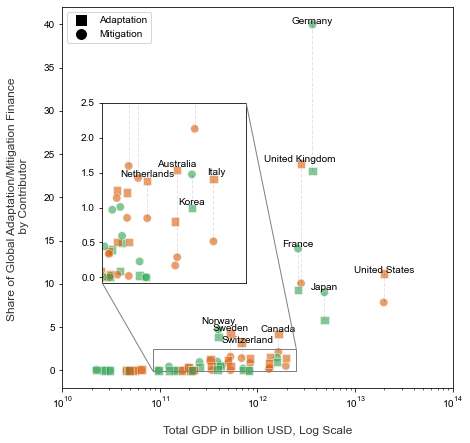

In [21]:
###Plot Figure
output_folder_don=output_folder_miti=dir_path+'Figures/Fig2/donors_scatter.png'
scatter_donors(df=df2,output_folder=output_folder_don)

